Loading pakcages and data (images) into notebook

In [6]:
#load packages
import os  
import pandas as pd  
import matplotlib.pyplot as plt  


image_folder = "/Users/shikhusanjel/Desktop/CNNTEST/Images"
train_lines_path = "/Users/shikhusanjel/Desktop/CNNTEST/Sets/TrainLines.txt"
transcription_folder = "/Users/shikhusanjel/Desktop/CNNTEST/Transcriptions"


In [7]:
!pip install opencv-python
import cv2  

In [8]:
# data path
data_folder = "/Users/shikhusanjel/Desktop/CNNTEST"

# file names listed
print("Files in dataset:", os.listdir(data_folder))


Files in dataset: ['.DS_Store', 'Images', 'Untitled.ipynb', 'Transcriptions', 'Sets', '.ipynb_checkpoints']


In [9]:
train_lines_path = "/Users/shikhusanjel/Desktop/CNNTEST/Sets/TrainLines.txt" 

# read and store file names
with open("/Users/shikhusanjel/Desktop/CNNTEST/Sets/TrainLines.txt", "r") as file:
    train_filenames = file.read().splitlines()  

print("Successfully loaded TrainLines.txt")
print("First 5 filenames:", train_filenames[:5])  


Successfully loaded TrainLines.txt
First 5 filenames: ['train2011-150_000001', 'train2011-150_000002', 'train2011-150_000003', 'train2011-150_000004', 'train2011-150_000005']


In [10]:
image_folder = "/Users/shikhusanjel/Desktop/CNNTEST/Images"  

train_images = [os.path.join(image_folder, f"{name}.jpg") for name in train_filenames]
missing_files = [img for img in train_images if not os.path.exists(img)]

print(f"Image path creation done. Missing files: {len(missing_files)}")
if len(missing_files) > 0:
    print("⚠ Some image files are missing. Check file extensions (JPG/PNG) or folder location.")


Image path creation done. Missing files: 0


In [11]:
train_lines_path = "/Users/shikhusanjel/Desktop/CNNTTEST/Sets/TrainLines.txt"  # Update if needed


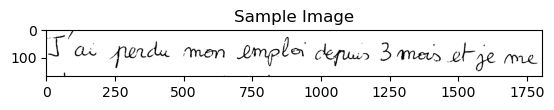

In [12]:
import cv2
import matplotlib.pyplot as plt

# loading and displaying the first image
img_path = train_images[0]  
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 

if img is None:
    print("⚠ Image loading failed. Check file path and extension.")
else:
    plt.imshow(img, cmap="gray")
    plt.title("Sample Image")
    plt.show()


Preprocess Images for CNN

In [14]:
#Resize images to (128x32) pixels for uniform input size
#Normalize pixel values between 0 and 1 for better training
#Convert images into NumPy arrays for efficient processing.


import numpy as np
import cv2

# define image size 
IMG_HEIGHT = 32
IMG_WIDTH = 128

# the function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load grayscale
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize to uniform size
    img = img / 255.0  # Normalize pixel values between 0-1
    img = np.expand_dims(img, axis=-1)  # Add channel dimension for CNN
    return img

# applying preprocessing to all images
train_images_processed = np.array([preprocess_image(img_path) for img_path in train_images])

print(f"Preprocessing complete! Processed {len(train_images_processed)} images")
print(f"Image shape: {train_images_processed[0].shape}")  


Preprocessing complete! Processed 10188 images
Image shape: (32, 128, 1)


Load Labels

In [16]:
# path to TrainLines.txt
train_lines_path = "/Users/shikhusanjel/Desktop/CNNTEST/Sets/TrainLines.txt"

# path to Images folder
image_folder = "/Users/shikhusanjel/Desktop/CNNTEST/Images"

# read TrainLines.txt and extract filenames
with open(train_lines_path, "r") as file:
    train_filenames = [line.strip() for line in file.readlines()]  

# convert filenames to full image paths
train_images = [os.path.join(image_folder, f"{name}.jpg") for name in train_filenames]

# check if files exist
missing_files = [img for img in train_images if not os.path.exists(img)]

# output 
print(f"Total images found: {len(train_images) - len(missing_files)}")
print(f"Missing images: {len(missing_files)}")


Total images found: 10188
Missing images: 0


In [17]:
# path to folder 
transcriptions_folder = "/Users/shikhusanjel/Desktop/CNNTEST/Transcriptions"

# dictionary to store labels (image name to label content)
train_labels = {}

# read transcriptions for each image in train_images
for image_path in train_images:
    image_name = os.path.basename(image_path).replace(".jpg", ".txt")  
    transcription_path = os.path.join(transcriptions_folder, image_name)
    
    # Check if transcription file exists
    if os.path.exists(transcription_path):
        with open(transcription_path, "r") as file:
            train_labels[image_path] = file.read().strip()  
    else:
        train_labels[image_path] = None  

# results
print(f"Total labels loaded: {sum(1 for v in train_labels.values() if v is not None)}")
print(f"Missing labels: {sum(1 for v in train_labels.values() if v is None)}")

# print first 5 images with labels
print("\nSample image-label pairs:")
for img, lbl in list(train_labels.items())[:5]:
    print(f"{img} -> {lbl}")


Total labels loaded: 10188
Missing labels: 0

Sample image-label pairs:
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000001.jpg -> J'ai perdu mon emploi depuis 3 mois et je me
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000002.jpg -> retrouve en grande difficulté financière.
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000003.jpg -> Je vous demande donc de m'accorder des
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000004.jpg -> facilités de paiement et si cela était possible
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000005.jpg -> une réduction sur mon tarif d'électricité.


Load Images & Prepare Data

In [24]:
#Load and Match Transcriptions

# read transcriptions for each image in train_images
for image_path in train_images:
    image_name = os.path.basename(image_path).replace(".jpg", ".txt")  
    transcription_path = os.path.join(transcriptions_folder, image_name)
    
    # check if transcription file exists
    if os.path.exists(transcription_path):
        with open(transcription_path, "r", encoding="utf-8") as file:
            train_labels[image_path] = file.read().strip()  
    else:
        train_labels[image_path] = None  

# results
total_labels = sum(1 for v in train_labels.values() if v is not None)
missing_labels = sum(1 for v in train_labels.values() if v is None)

print(f" Total labels loaded: {total_labels}")
print(f" Missing labels: {missing_labels}")

# Print first 5 images with labels
print("\n Sample image-label pairs:")
for img, lbl in list(train_labels.items())[:5]:
    print(f"{img} -> {lbl}")

 Total labels loaded: 10188
 Missing labels: 0

 Sample image-label pairs:
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000001.jpg -> J'ai perdu mon emploi depuis 3 mois et je me
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000002.jpg -> retrouve en grande difficulté financière.
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000003.jpg -> Je vous demande donc de m'accorder des
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000004.jpg -> facilités de paiement et si cela était possible
/Users/shikhusanjel/Desktop/CNNTEST/Images/train2011-150_000005.jpg -> une réduction sur mon tarif d'électricité.


Tokenization and vectorization

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [28]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [30]:

# extract transcriptions 
texts = [label for label in train_labels.values() if label is not None]

# initialize tokenizer and fit on text data
tokenizer = Tokenizer(char_level=True, oov_token=None)  # Character-level tokenization
tokenizer.fit_on_texts(texts)

# convert text labels to sequences of numbers
train_sequences = tokenizer.texts_to_sequences(texts)

# pad sequences to ensure uniform length
max_length = max(len(seq) for seq in train_sequences)  # Find longest label
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post")

print(f"Text tokenization complete! Processed {len(train_padded)} labels")
print(f"Example tokenized label: {train_sequences[0]}")
print(f"Example padded label: {train_padded[0]}")


Text tokenization complete! Processed 10188 labels
Example tokenized label: [19, 21, 7, 6, 1, 15, 2, 4, 11, 10, 1, 12, 8, 5, 1, 2, 12, 15, 13, 8, 6, 1, 11, 2, 15, 10, 6, 3, 1, 39, 1, 12, 8, 6, 3, 1, 2, 9, 1, 19, 2, 1, 12, 2]
Example padded label: [19 21  7  6  1 15  2  4 11 10  1 12  8  5  1  2 12 15 13  8  6  1 11  2
 15 10  6  3  1 39  1 12  8  6  3  1  2  9  1 19  2  1 12  2  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


Splitting Data into Train/Validation Sets

In [107]:
# Keep only images that have corresponding labels
filtered_train_images = [img for img in train_images if img in train_labels]

print(f"Updated image count: {len(filtered_train_images)}")


Updated image count: 5216


In [109]:
from sklearn.model_selection import train_test_split

# Ensure image paths and labels match in length
train_img_paths, test_img_paths, train_texts, test_texts = train_test_split(
    filtered_train_images,  # Filtered images only
    [train_labels[img] for img in filtered_train_images],  
    test_size=0.2, 
    random_state=42
)

# Convert back into dictionaries
train_labels = dict(zip(train_img_paths, train_texts))
test_labels = dict(zip(test_img_paths, test_texts))

print(f"Training images: {len(train_labels)}, Test images: {len(test_labels)}")


Training images: 4172, Test images: 1044


Building the Model

In [111]:
#starting  CNN + BiLSTM + CTC model

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Bidirectional, LSTM, Input, Reshape
from tensorflow.keras.models import Model

# input shape
IMG_HEIGHT = 32
IMG_WIDTH = 128
VOCAB_SIZE = len(tokenizer.word_index) + 1  # Number of unique characters + 1 for padding

# input layer
input_img = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1), name="image_input")

# CNN feature extractor
x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(64, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(128, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D(pool_size=(2,2))(x)

# reshape for LSTM input
x = Reshape(target_shape=((IMG_WIDTH // 8), (IMG_HEIGHT // 8) * 128))(x)

# BiLSTM for sequence modeling
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Bidirectional(LSTM(128, return_sequences=True))(x)

# output layer with softmax activation for character prediction
output = Dense(VOCAB_SIZE, activation="softmax", name="output")(x)

# defined model
model = Model(inputs=input_img, outputs=output)

# model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)        │ (None, 32, 128, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 128, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 32, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 32, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 16, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 16, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 16, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 16, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 16, 71)         │        18,247 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,161,543 (4.43 MB)

 Trainable params: 1,161,543 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

 Preprocess the Test images

In [113]:
#Preprocessing the test images
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    img = cv2.resize(img, (128, 32))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=-1)  
    return img

# Apply preprocessing to test images
test_images_processed = np.array([preprocess_image(img_path) for img_path in test_img_paths])

print(f"Preprocessing complete! Processed {len(test_images_processed)} test images.")
print(f"Example test image shape: {test_images_processed[0].shape}")


Preprocessing complete! Processed 1044 test images.
Example test image shape: (32, 128, 1)


In [135]:
MAX_SEQ_LENGTH = 16  # Match the model's output length

# Re-run tokenization & padding with updated length
train_sequences_padded = pad_sequences(train_sequences, maxlen=MAX_SEQ_LENGTH, padding="post")
test_sequences_padded = pad_sequences(test_sequences, maxlen=MAX_SEQ_LENGTH, padding="post")

print(f"New Train Label Shape: {train_sequences_padded.shape}")  # Should now match (None, 16)
print(f"New Test Label Shape: {test_sequences_padded.shape}")


New Train Label Shape: (10188, 16)
New Test Label Shape: (1044, 16)


In [137]:
print("Train Images Shape:", np.array(train_images_processed).shape)
print("Train Labels Shape:", np.array(train_sequences_padded).shape)
print("Test Images Shape:", np.array(test_images_processed).shape)
print("Test Labels Shape:", np.array(test_sequences_padded).shape)


Train Images Shape: (10188, 32, 128, 1)
Train Labels Shape: (10188, 16)
Test Images Shape: (1044, 32, 128, 1)
Test Labels Shape: (1044, 16)


Start Model Training

In [139]:
# Compile the model
model.compile(
    optimizer="adam",          # You can change to another optimizer if needed
    loss="sparse_categorical_crossentropy",  # Use categorical loss for text classification
    metrics=["accuracy"]       # Track accuracy during training
)

print("Model compiled successfully!")


Model compiled successfully!


In [3]:
# Training configuration
BATCH_SIZE = 32
EPOCHS = 20

# Train model
history = model.fit(train_images_processed, train_sequences_padded, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE, 
                    validation_data=(test_images_processed, test_sequences_padded))

print("Training completed successfully!")


NameError: name 'model' is not defined

In [ ]:
#after epochs run: 

#evaluate model
test_loss, test_acc = model.evaluate(test_images_processed, test_sequences_padded)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

#save model without retraining
model.save("handwriting_model.h5")
print("Model saved successfully!")
